# Sea Level Predictor

This is another "clone" of freeCodeCamp's [Data Analysis with Python project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/sea-level-predictor) with the goal of being able to analyze a dataset of the global average sea level change since 1880 and to use the data to predict the sea level change through year 2050.

Before we get started, we import the important libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib
matplotlib.use("Agg")

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import the dataset.

In [4]:
raw_data = pd.read_csv("epa-sea-level.csv")

We can see some samples in the raw data as follows.

In [5]:
raw_data.sample(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
113,1993,6.291339,6.027559,6.555118,6.297493
64,1944,2.846457,2.425197,3.267717,NaN
83,1963,4.480315,4.220472,4.740157,NaN
131,2011,8.964567,8.661417,9.267717,8.053065
102,1982,5.858268,5.610236,6.106299,NaN


We copy the raw data to a ```data``` variable for use in analysis.

In [6]:
data = raw_data.copy()

In [7]:
data.sample(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
18,1898,1.043307,0.267717,1.818898,NaN
124,2004,7.740157,7.464567,8.015748,7.507933
65,1945,2.956693,2.535433,3.377953,NaN
15,1895,0.767717,-0.082677,1.618110,NaN
22,1902,1.291339,0.610236,1.972441,NaN


Take a look at some of ```data```'s properties.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


First, we would like to create a scatter plot from the data, using ```Year``` as the x-axis and ```CSIRO Adjusted Sea Level``` as the y-axis.

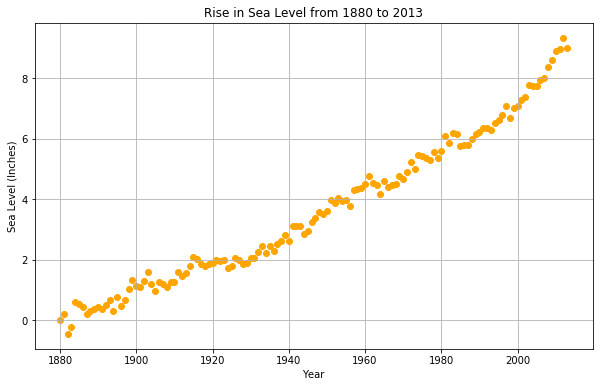

In [16]:
def draw_scatter_plot():
    fig, ax = plt.subplots(figsize = (10, 6))
    
    x = data["Year"].to_numpy()
    y = data["CSIRO Adjusted Sea Level"].to_numpy()
    
    ax.scatter(x, y, color = 'orange', label = 'Original Data')
    ax.set_xlabel("Year")
    ax.set_ylabel("Sea Level (Inches)")
    ax.set_title("Rise in Sea Level from 1880 to 2013")
    ax.grid()
    
    fig.savefig("sea_level_scatter_plot.png")

draw_scatter_plot()

Next, we would like to perform linear regression to predict sea level rise in the future.

We will use the ```linregress``` function from ```scipy.stats``` to get the slope and y-intercept of the line of best fit. We will also plot the line of best fit over the top of the scatter plot. We would like to make the line go through the year 2050 to predict the sea level rise in 2050.

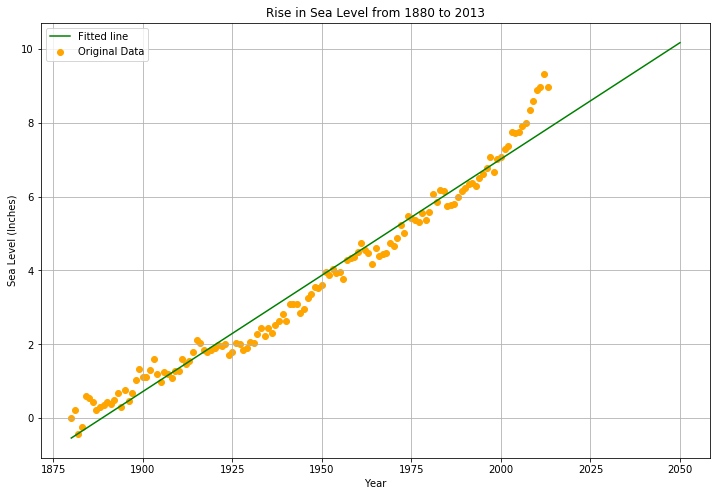

In [19]:
def draw_first_regression_line():
    
    # Initialize figure
    fig, ax = plt.subplots(figsize = (12, 8))
    
    # Define x and y labels
    x_1 = data['Year'].to_numpy()
    y_1 = data['CSIRO Adjusted Sea Level'].to_numpy()
    
    # Create the scatter plot from the original data
    ax.scatter(x_1, y_1, color = 'orange', label = 'Original Data')
    
    # Obtain the first slope and intercept from the original data
    (slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = linregress(x_1, y_1)
    
    # Define the ranges of x and y for the linear regression line
    x_reg_1 = np.arange(data["Year"][0], 2051)
    y_pred_1 = intercept_1 + slope_1 * x_reg_1
    
    # Plot the regression line
    ax.plot(x_reg_1, y_pred_1, color="green", label="Fitted line")
    
    # Set labels
    ax.legend(loc='best')
    ax.set_xlabel('Year') 
    ax.set_ylabel('Sea Level (Inches)')
    ax.set_title("Rise in Sea Level from 1880 to 2013")
    ax.grid()
 
    # Save result in file.
    fig.savefig("scipy-first-linregress.png")

draw_first_regression_line()

Finally, we would like to plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. We will also make the line go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

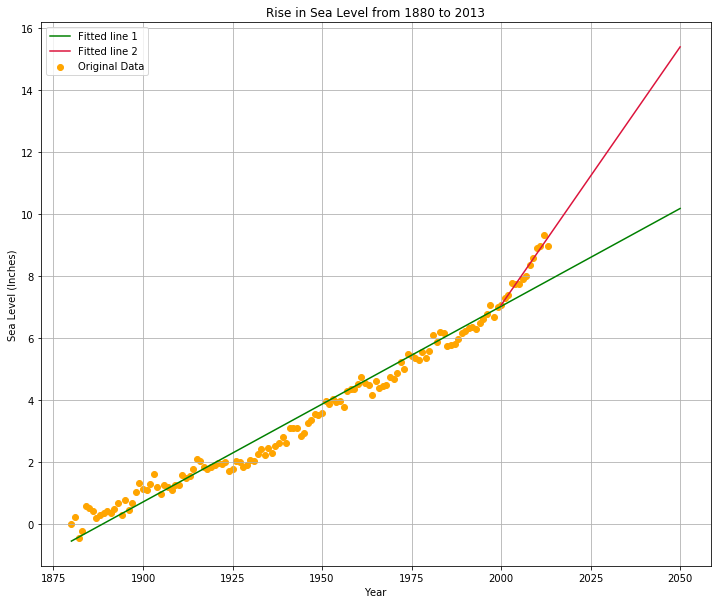

In [21]:
def draw_second_regression_line():
    
    # Initialize figure
    fig, ax = plt.subplots(figsize = (12, 10))
    
    # Define x and y labels
    x_1 = data['Year'].to_numpy()
    y_1 = data['CSIRO Adjusted Sea Level'].to_numpy()
    
    # Create the scatter plot from the original data
    ax.scatter(x_1, y_1, color = 'orange', label = 'Original Data')
    
    # Obtain the first slope and intercept from the original data
    (slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = linregress(x_1, y_1)
    
    # Define the ranges of x and y for the first linear regression line
    x_reg_1 = np.arange(data["Year"][0], 2051)
    y_pred_1 = intercept_1 + slope_1 * x_reg_1
    
    # Plot the first regression line
    ax.plot(x_reg_1, y_pred_1, color="green", label="Fitted line 1")
    
    # Define x and y labels for the second linear regresion line
    x_2 = data[data["Year"] >= 2000]["Year"].to_numpy()
    y_2 = np.round_(data[data["Year"] >= 2000]["CSIRO Adjusted Sea Level"].to_numpy(), 7)

    # Obtain the second slope and intercept from the data of year 2000 to 2013
    (slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = linregress(x_2, y_2)

    # Define the ranges of x and y for the second linear regression line
    x_reg_2 = np.arange(2000, 2051)
    y_pred_2 = intercept_2 + slope_2 * x_reg_2
    
    # Plot the second regression line
    ax.plot(x_reg_2, y_pred_2, color="crimson", label="Fitted line 2")
    
    # Set labels
    ax.legend(loc='best')
    ax.set_xlabel('Year') 
    ax.set_ylabel('Sea Level (Inches)')
    ax.set_title("Rise in Sea Level from 1880 to 2013")
    ax.grid()
 
    # Save result in file.
    fig.savefig("scipy-second-linregress.png")

draw_second_regression_line()

From the above scatter plot and linear regression lines, we may have a hypothesis that, since the year 2000, the sea level may have been increase in an increasing rate, or exponentially.